In [11]:
#Importing the Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

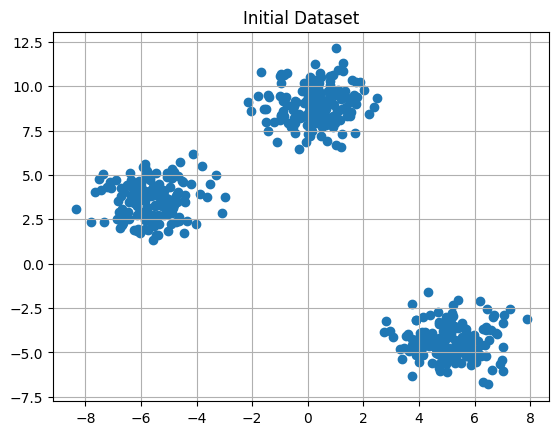

In [3]:
# Step 2: Creating Custom Dataset
# We will generate a synthetic dataset with make_blobs.
X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1])
plt.title("Initial Dataset")
plt.show()

In [4]:
# Step 3: Initializing Random Centroids
k = 3
clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2 * (2 * np.random.random((X.shape[1],)) - 1)
    points = []
    cluster = {
        'center': center,
        'points': []
    }
    clusters[idx] = cluster

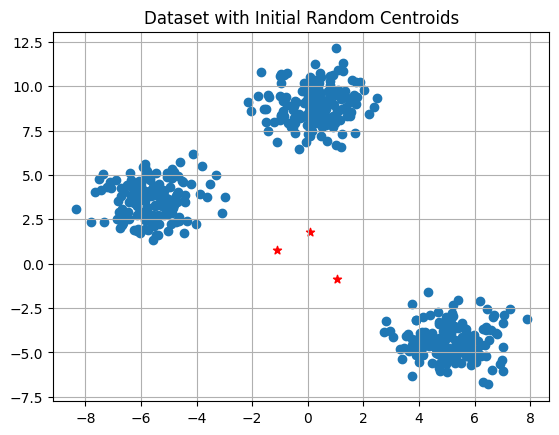

In [5]:
# Step 4: Plotting Random Initialized Center with Data Points
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='*', c='red')
plt.title("Dataset with Initial Random Centroids")
plt.show()

In [6]:
# Step 5: Defining Euclidean Distance
def distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

In [7]:
# Step 6: Creating Assign and Update Functions

def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []
        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x, clusters[i]['center'])
            dist.append(dis)

        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis=0)
            clusters[i]['center'] = new_center

            # Clear points for the next iteration
            clusters[i]['points'] = []
    return clusters

In [8]:
# Step 7: Predicting the Cluster for the Data Points
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [9]:
# Step 8: Assigning, Updating and Predicting the Cluster Centers
# We run the assignment and update steps multiple times to allow centroids to converge
iterations = 5  # You can increase this number for better convergence

for _ in range(iterations):
    clusters = assign_clusters(X, clusters)
    clusters = update_clusters(X, clusters)

# Predict the final clusters
pred = pred_cluster(X, clusters)

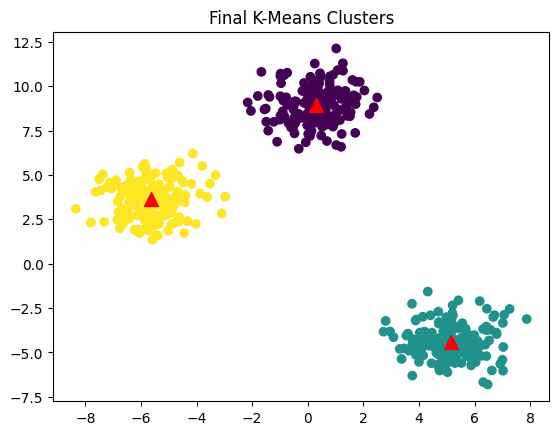

In [10]:
# Step 9: Plotting Data Points with Predicted Cluster Centers
plt.scatter(X[:, 0], X[:, 1], c=pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0], center[1], marker='^', c='red', s=100)
plt.title("Final K-Means Clusters")
plt.show()